<a href="https://colab.research.google.com/github/maeve70/SentimentAnalysis2ElectricBoogaloo/blob/main/SentimentAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vader: Valence Aware Dictionary for Sentiment Reasoning

I had started to use an IFTTT applet back in 2017 to track the tweets of 3 twitter accounts: @realDonaldTrump , @POTUS, @PressSec (if you didn't know, Dan Scavino, former WH Deputy Chief of Staff, was behind the Potus account.) because I wanted to see frequency of tweets, how many tweets based on certain words contained in the tweets etc.

The applet (not created by me) tracked the accounts and put the tweets, and a link to the tweets into a Google Sheet. I had a couple data vizzes in Tableau: Here from 4/1/2017 - 8/1/2019:

https://public.tableau.com/app/profile/lisa3690/viz/Twitter_39/Dashboard1

and this one is just his tweets from 12/2017 - 2/1/2021

https://public.tableau.com/app/profile/lisa3690/viz/DrumpfTweets12-17-PresentDay/FrequencybySubjectMonth

The spreadsheet does include links to the tweets, ~~however, since a certain someone is no longer on Twitter, you cannot see them~~ which (not astonishingly) you can now see again since his Twitter account has been re-instated. And, the other two accounts have been replaced by the current Biden administration personnel. The csv file is a historical record of the tweets at those timeframes. The dates for this particular data set of tweets is 9/29/2020 - 1/07/2021, the day after he was originally kicked off Twitter.

This csv file contains 2178 tweets from that time period.

I was influenced by the last meeting of the Jan. 6th Congressional Cmte. to look at the Tweets from his account leading up to the attack/insurrection on the U.S. Capitol.


*This is a continuation of a previous notebook of sentiment analysis. I wanted to try out Vader. What is below is me learning how to use Vader to analyze the sentiments of the tweets. I'm not sure what I'll find. It's all a learning process!* 

***This is a WIP***

In [1]:
import pandas as pd
import seaborn as sns;
from matplotlib import pyplot as plt
import numpy as np
import nltk
import nltk.corpus
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#other resources to consider using
nltk.download([
...     "names",
...     "stopwords",
...     "state_union",
...     "twitter_samples",
...     "movie_reviews",
...     "averaged_perceptron_tagger",
...     "vader_lexicon",
...     "punkt",
... ])

Sentiment Intensity Analyzer, sid classifies a string into 1 of 4 categories:

negative

neutral

positive

compound (computed by normalizing the scores above)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/maeve70/csvfiles/main/realDonaldTrump%20(9)%20-%209292020_01072021.csv')

In [4]:
df.head()

,User,Tweets,Link to Tweet,Date/Time
0,@realDonaldTrump,https://t.co/kWxETQoUUN,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:48PM"
1,@realDonaldTrump,https://t.co/w6Vlywaesb,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:50PM"
2,@realDonaldTrump,https://t.co/UwyDwoDQgp,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:52PM"
3,@realDonaldTrump,https://t.co/LnBpKJE9yi,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:53PM"
4,@realDonaldTrump,https://t.co/gF4VmXWFoK,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:54PM"


In [ ]:
df.tail()

,User,Tweets,Link to Tweet,Date/Time,scores,compound
2173,@realDonaldTrump,Please support our Capitol Police and Law Enfo...,http://twitter.com/realDonaldTrump/status/1346...,"January 06, 2021 at 02:38PM","{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'comp...",0.8858
2174,@realDonaldTrump,I am asking for everyone at the U.S. Capitol t...,http://twitter.com/realDonaldTrump/status/1346...,"January 06, 2021 at 03:13PM","{'neg': 0.125, 'neu': 0.555, 'pos': 0.321, 'co...",0.8715
2175,@realDonaldTrump,https://t.co/Pm2PKV0Fp3,http://twitter.com/realDonaldTrump/status/1346...,"January 06, 2021 at 04:17PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2176,@realDonaldTrump,These are the things and events that happen wh...,http://twitter.com/realDonaldTrump/status/1346...,"January 06, 2021 at 06:01PM","{'neg': 0.1, 'neu': 0.687, 'pos': 0.213, 'comp...",0.8140
2177,@realDonaldTrump,https://t.co/csX07ZVWGe,http://twitter.com/realDonaldTrump/status/1347...,"January 07, 2021 at 07:10PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User           2178 non-null   object
 1   Tweets         2178 non-null   object
 2   Link to Tweet  2178 non-null   object
 3   Date/Time      2178 non-null   object
dtypes: object(4)
memory usage: 68.2+ KB


In [ ]:
df.isnull().sum()

User             0
Tweets           0
Link to Tweet    0
Date/Time        0
dtype: int64

No nulls. hooray. 

In [ ]:
df['User'].value_counts()

@realDonaldTrump    2178
Name: User, dtype: int64

In [ ]:
df['Date/Time'].value_counts()

October 31, 2020 at 11:08AM     10
October 31, 2020 at 11:07AM      7
November 02, 2020 at 01:26PM     6
December 29, 2020 at 08:59AM     4
November 02, 2020 at 11:19AM     4
                                ..
October 24, 2020 at 10:28AM      1
October 24, 2020 at 10:27AM      1
October 24, 2020 at 12:47AM      1
October 24, 2020 at 12:46AM      1
January 07, 2021 at 07:10PM      1
Name: Date/Time, Length: 1917, dtype: int64

Sentiment Intensity Analyzer, sid classifies a string into 1 of 4 categories:

negative

neutral

positive

compound (computed by normalizing the scores above)

The polarity scores range from:

most extreme negative, -1

most extreme positive, 1

neutral, 0

See the readme: https://github.com/cjhutto/vaderSentiment

In [5]:
#test sid analyzer c & d are actual drumpf tweets. will return a dictionary of keys:values

a= "This is a good movie."
b= "This movie is awful!"
c = 'North Korea is behaving very badly. They have been "playing" the United States for years. China has done little to help!'
d= 'James Clapper and others stated that there is no evidence Potus colluded with Russia. This story is FAKE NEWS and everyone knows it!'
e='You are a horrible human being!!'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [ ]:
sid.polarity_scores(b)

{'neg': 0.523, 'neu': 0.477, 'pos': 0.0, 'compound': -0.5093}

In [ ]:
sid.polarity_scores(c)

{'neg': 0.126, 'neu': 0.669, 'pos': 0.205, 'compound': 0.2779}

In [ ]:
sid.polarity_scores(d)

{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.745}

In [6]:
sid.polarity_scores(e)

{'neg': 0.505, 'neu': 0.495, 'pos': 0.0, 'compound': -0.6229}

In [8]:
#create a column called scores to analyze tweets with scores as a dictionary (as noted above)
df['scores'] = df['Tweets'].apply(lambda Tweets: sid.polarity_scores(Tweets))

df.head()

,User,Tweets,Link to Tweet,Date/Time,scores
0,@realDonaldTrump,https://t.co/kWxETQoUUN,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:48PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,@realDonaldTrump,https://t.co/w6Vlywaesb,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:50PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@realDonaldTrump,https://t.co/UwyDwoDQgp,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:52PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,@realDonaldTrump,https://t.co/LnBpKJE9yi,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:53PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,@realDonaldTrump,https://t.co/gF4VmXWFoK,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:54PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


Create a column that will compoud the scores into positive or negative from the scores dictionary.

*Note: You can view the whole tweet if you use the "magic wand" icon which converts the table into an interactive table. *

In [9]:
#Let's separate out compound score into it's own column.

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,User,Tweets,Link to Tweet,Date/Time,scores,compound
0,@realDonaldTrump,https://t.co/kWxETQoUUN,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:48PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
1,@realDonaldTrump,https://t.co/w6Vlywaesb,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:50PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,@realDonaldTrump,https://t.co/UwyDwoDQgp,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:52PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,@realDonaldTrump,https://t.co/LnBpKJE9yi,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:53PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,@realDonaldTrump,https://t.co/gF4VmXWFoK,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:54PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [10]:
df.tail()

,User,Tweets,Link to Tweet,Date/Time,scores,compound
2173,@realDonaldTrump,Please support our Capitol Police and Law Enfo...,http://twitter.com/realDonaldTrump/status/1346...,"January 06, 2021 at 02:38PM","{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'comp...",0.8858
2174,@realDonaldTrump,I am asking for everyone at the U.S. Capitol t...,http://twitter.com/realDonaldTrump/status/1346...,"January 06, 2021 at 03:13PM","{'neg': 0.125, 'neu': 0.555, 'pos': 0.321, 'co...",0.8715
2175,@realDonaldTrump,https://t.co/Pm2PKV0Fp3,http://twitter.com/realDonaldTrump/status/1346...,"January 06, 2021 at 04:17PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2176,@realDonaldTrump,These are the things and events that happen wh...,http://twitter.com/realDonaldTrump/status/1346...,"January 06, 2021 at 06:01PM","{'neg': 0.1, 'neu': 0.687, 'pos': 0.213, 'comp...",0.8140
2177,@realDonaldTrump,https://t.co/csX07ZVWGe,http://twitter.com/realDonaldTrump/status/1347...,"January 07, 2021 at 07:10PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [11]:
#Need to see whether the overall sentiment is positive or negative.
#add a column for a compound score
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score
0,@realDonaldTrump,https://t.co/kWxETQoUUN,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:48PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
1,@realDonaldTrump,https://t.co/w6Vlywaesb,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:50PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
2,@realDonaldTrump,https://t.co/UwyDwoDQgp,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:52PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
3,@realDonaldTrump,https://t.co/LnBpKJE9yi,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:53PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
4,@realDonaldTrump,https://t.co/gF4VmXWFoK,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:54PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos


In [12]:
df['comp_score'].value_counts()

pos    1602
neg     576
Name: comp_score, dtype: int64

Perhaps this isn't the most appropriate nltk sentiment library/tool to use to analyze this stuff...I need to think on this.

In [13]:
df['compound'].mean()

0.1301230945821855

In [14]:
df['compound'].median()

0.0

data is right-skewed, mean is higher than median.

In [15]:
df['compound'].std()

0.5251809885323545

In [ ]:
#df[['compound', 'User']].groupby('User').median()

Let's see if there are certain keywords in the tweets that are negative but 
might not register as negative. Words that we all know he kept repeating especially after the election of 2020. Words like: election, stolen, votes, Democrats, conspiracy, etc. 

In [17]:
#df[df.column.str.contains("word")]
df[df.Tweets.str.contains("election")]


,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score
6,@realDonaldTrump,“The Fraternal Order of Police endorsed Presid...,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:58PM","{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.6369,pos
106,@realDonaldTrump,RT @MaryVought: Trump poll watcher kicked out ...,http://twitter.com/realDonaldTrump/status/1311...,"October 01, 2020 at 06:27PM","{'neg': 0.066, 'neu': 0.934, 'pos': 0.0, 'comp...",-0.4939,neg
150,@realDonaldTrump,Wow. Joe Biden just took a more Liberal positi...,http://twitter.com/realDonaldTrump/status/1313...,"October 06, 2020 at 07:39AM","{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...",0.9392,pos
274,@realDonaldTrump,RT @JoeTalkShow: Extremely rich career politic...,http://twitter.com/realDonaldTrump/status/1314...,"October 08, 2020 at 03:45PM","{'neg': 0.059, 'neu': 0.787, 'pos': 0.154, 'co...",0.6523,pos
288,@realDonaldTrump,"RT @NickForVA: I'm live online tonight, joined...",http://twitter.com/realDonaldTrump/status/1314...,"October 08, 2020 at 11:37PM","{'neg': 0.0, 'neu': 0.962, 'pos': 0.038, 'comp...",0.1739,pos
...,...,...,...,...,...,...,...
2137,@realDonaldTrump,How can you certify an election when the numbe...,http://twitter.com/realDonaldTrump/status/1346...,"January 04, 2021 at 10:07AM","{'neg': 0.05, 'neu': 0.825, 'pos': 0.125, 'com...",0.5630,pos
2154,@realDonaldTrump,Washington is being inundated with people who ...,http://twitter.com/realDonaldTrump/status/1346...,"January 05, 2021 at 05:05PM","{'neg': 0.059, 'neu': 0.739, 'pos': 0.202, 'co...",0.8279,pos
2155,@realDonaldTrump,Washington is being inundated with people who ...,http://twitter.com/realDonaldTrump/status/1346...,"January 05, 2021 at 05:05PM","{'neg': 0.059, 'neu': 0.739, 'pos': 0.202, 'co...",0.8279,pos
2156,@realDonaldTrump,"I hope the Democrats, and even more importantl...",http://twitter.com/realDonaldTrump/status/1346...,"January 05, 2021 at 05:12PM","{'neg': 0.157, 'neu': 0.679, 'pos': 0.164, 'co...",0.0847,pos


In [18]:
df[df.Tweets.str.contains("stolen")]

,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score
1462,@realDonaldTrump,Must see @seanhannity takedown of the horrible...,http://twitter.com/realDonaldTrump/status/1327...,"November 12, 2020 at 10:46PM","{'neg': 0.114, 'neu': 0.663, 'pos': 0.222, 'co...",0.8016,pos
1498,@realDonaldTrump,People are not going to stand for having this ...,http://twitter.com/realDonaldTrump/status/1327...,"November 14, 2020 at 03:07PM","{'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'comp...",-0.5411,neg
1738,@realDonaldTrump,....The fact that our Country is being stolen....,http://twitter.com/realDonaldTrump/status/1337...,"December 10, 2020 at 09:33AM","{'neg': 0.183, 'neu': 0.757, 'pos': 0.06, 'com...",-0.6900,neg
1790,@realDonaldTrump,"Who is a worse governor, @BrianKempGA of Georg...",http://twitter.com/realDonaldTrump/status/1337...,"December 12, 2020 at 08:19AM","{'neg': 0.151, 'neu': 0.65, 'pos': 0.199, 'com...",0.4015,pos
1863,@realDonaldTrump,Democrats would never put up with a Presidenti...,http://twitter.com/realDonaldTrump/status/1339...,"December 17, 2020 at 06:10PM","{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...",-0.5411,neg
1894,@realDonaldTrump,He didn’t win the Election. He lost all 6 Swin...,http://twitter.com/realDonaldTrump/status/1340...,"December 19, 2020 at 09:41AM","{'neg': 0.226, 'neu': 0.599, 'pos': 0.175, 'co...",-0.2960,neg
2122,@realDonaldTrump,RT @SidneyPowell1: This “election” was stolen ...,http://twitter.com/realDonaldTrump/status/1345...,"January 03, 2021 at 10:22AM","{'neg': 0.221, 'neu': 0.7, 'pos': 0.079, 'comp...",-0.8360,neg
2154,@realDonaldTrump,Washington is being inundated with people who ...,http://twitter.com/realDonaldTrump/status/1346...,"January 05, 2021 at 05:05PM","{'neg': 0.059, 'neu': 0.739, 'pos': 0.202, 'co...",0.8279,pos
2155,@realDonaldTrump,Washington is being inundated with people who ...,http://twitter.com/realDonaldTrump/status/1346...,"January 05, 2021 at 05:05PM","{'neg': 0.059, 'neu': 0.739, 'pos': 0.202, 'co...",0.8279,pos
2156,@realDonaldTrump,"I hope the Democrats, and even more importantl...",http://twitter.com/realDonaldTrump/status/1346...,"January 05, 2021 at 05:12PM","{'neg': 0.157, 'neu': 0.679, 'pos': 0.164, 'co...",0.0847,pos


In [19]:
df[df['Tweets'].str.contains(r'election(?!$)')]
#same as above

,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score
6,@realDonaldTrump,“The Fraternal Order of Police endorsed Presid...,http://twitter.com/realDonaldTrump/status/1311...,"September 29, 2020 at 09:58PM","{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.6369,pos
106,@realDonaldTrump,RT @MaryVought: Trump poll watcher kicked out ...,http://twitter.com/realDonaldTrump/status/1311...,"October 01, 2020 at 06:27PM","{'neg': 0.066, 'neu': 0.934, 'pos': 0.0, 'comp...",-0.4939,neg
150,@realDonaldTrump,Wow. Joe Biden just took a more Liberal positi...,http://twitter.com/realDonaldTrump/status/1313...,"October 06, 2020 at 07:39AM","{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...",0.9392,pos
274,@realDonaldTrump,RT @JoeTalkShow: Extremely rich career politic...,http://twitter.com/realDonaldTrump/status/1314...,"October 08, 2020 at 03:45PM","{'neg': 0.059, 'neu': 0.787, 'pos': 0.154, 'co...",0.6523,pos
288,@realDonaldTrump,"RT @NickForVA: I'm live online tonight, joined...",http://twitter.com/realDonaldTrump/status/1314...,"October 08, 2020 at 11:37PM","{'neg': 0.0, 'neu': 0.962, 'pos': 0.038, 'comp...",0.1739,pos
...,...,...,...,...,...,...,...
2137,@realDonaldTrump,How can you certify an election when the numbe...,http://twitter.com/realDonaldTrump/status/1346...,"January 04, 2021 at 10:07AM","{'neg': 0.05, 'neu': 0.825, 'pos': 0.125, 'com...",0.5630,pos
2154,@realDonaldTrump,Washington is being inundated with people who ...,http://twitter.com/realDonaldTrump/status/1346...,"January 05, 2021 at 05:05PM","{'neg': 0.059, 'neu': 0.739, 'pos': 0.202, 'co...",0.8279,pos
2155,@realDonaldTrump,Washington is being inundated with people who ...,http://twitter.com/realDonaldTrump/status/1346...,"January 05, 2021 at 05:05PM","{'neg': 0.059, 'neu': 0.739, 'pos': 0.202, 'co...",0.8279,pos
2156,@realDonaldTrump,"I hope the Democrats, and even more importantl...",http://twitter.com/realDonaldTrump/status/1346...,"January 05, 2021 at 05:12PM","{'neg': 0.157, 'neu': 0.679, 'pos': 0.164, 'co...",0.0847,pos


In [20]:
df[df.Tweets.str.contains("ballots")]

,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score
23,@realDonaldTrump,RT @abigailmarone: It's literal insanity watch...,http://twitter.com/realDonaldTrump/status/1311...,"September 30, 2020 at 01:02AM","{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.8748,neg
302,@realDonaldTrump,COLORADO! Your mail ballots are being sent out...,http://twitter.com/realDonaldTrump/status/1314...,"October 09, 2020 at 02:50PM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
311,@realDonaldTrump,"RT @ABC13News: Nearly 50,000 voters received w...",http://twitter.com/realDonaldTrump/status/1314...,"October 10, 2020 at 10:10AM","{'neg': 0.129, 'neu': 0.761, 'pos': 0.11, 'com...",-0.1260,neg
312,@realDonaldTrump,RT @ABC13News: New Jersey postal employee accu...,http://twitter.com/realDonaldTrump/status/1314...,"October 10, 2020 at 10:10AM","{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.5423,neg
313,@realDonaldTrump,RT @WTKR3: #Texas mayoral candidate arrested f...,http://twitter.com/realDonaldTrump/status/1314...,"October 10, 2020 at 10:12AM","{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compou...",-0.7845,neg
314,@realDonaldTrump,RT @jackturmanIII: The Franklin County Board o...,http://twitter.com/realDonaldTrump/status/1314...,"October 10, 2020 at 10:12AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
365,@realDonaldTrump,RT @ABC13News: President @realDonaldTrump clai...,http://twitter.com/realDonaldTrump/status/1315...,"October 12, 2020 at 08:42AM","{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...",-0.8442,neg
526,@realDonaldTrump,RT @Project_Veritas: He wouldn’t happen to mea...,http://twitter.com/realDonaldTrump/status/1316...,"October 15, 2020 at 07:54AM","{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'comp...",-0.2732,neg
540,@realDonaldTrump,"RT @Hansen4Congress: Come on, Man! When is @ge...",http://twitter.com/realDonaldTrump/status/1316...,"October 15, 2020 at 08:07AM","{'neg': 0.031, 'neu': 0.89, 'pos': 0.079, 'com...",0.4857,pos
653,@realDonaldTrump,“Bins full of ballots in a dumpster” https://t...,http://twitter.com/realDonaldTrump/status/1317...,"October 18, 2020 at 12:02AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [21]:
df[df.Tweets.str.contains("ballot box")]

,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score
966,@realDonaldTrump,"This Election Day, you must stop the Anti-Amer...",http://twitter.com/realDonaldTrump/status/1321...,"October 27, 2020 at 04:41PM","{'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'comp...",-0.7482,neg
1807,@realDonaldTrump,".....and many others voted illegally. Also, ma...",http://twitter.com/realDonaldTrump/status/1338...,"December 13, 2020 at 05:49PM","{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'comp...",-0.5423,neg
1819,@realDonaldTrump,RT @realDonaldTrump: .....and many others vote...,http://twitter.com/realDonaldTrump/status/1338...,"December 14, 2020 at 09:38AM","{'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'comp...",-0.5423,neg
1991,@realDonaldTrump,Time for Republican Senators to step up and fi...,http://twitter.com/realDonaldTrump/status/1342...,"December 26, 2020 at 06:23PM","{'neg': 0.132, 'neu': 0.754, 'pos': 0.114, 'co...",-0.2481,neg


In [22]:
df[df.Tweets.str.contains("mules")]

,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score


Let's do some visualizations. Note to self: do a new Tableau viz with this csv file.
Here's my Tableau Viz:

https://public.tableau.com/app/profile/lisa3690/viz/DrumpfTweetsSept_2020-Jan72021/BarGraphwithParameters

Messing with visualizations...seeing what looks good.

In [ ]:
#sns.set_palette('blah')
#I can never remember all the palette choices, so this is a good way to see them.:)

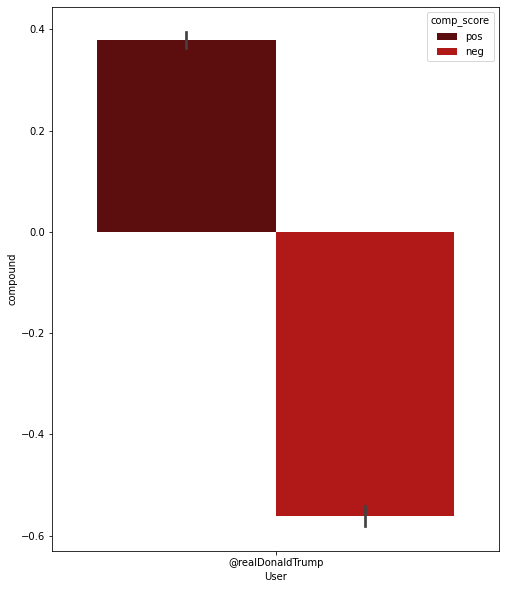

In [23]:
sns.set_palette('hot')
plt.figure(figsize= (8, 10))

sns.barplot(x = 'User', y= 'compound',
          hue='comp_score', data=df);   

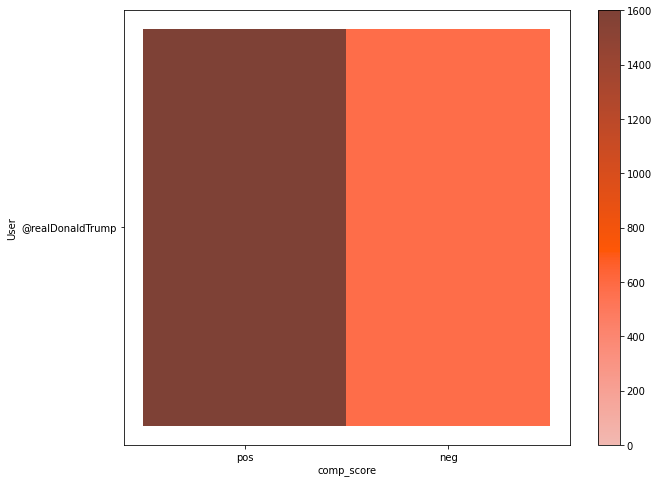

In [24]:
sns.set_palette('Oranges_r')
plt.figure(figsize= (10, 8))

sns.histplot(x='comp_score', y='User', cbar=True, data=df);

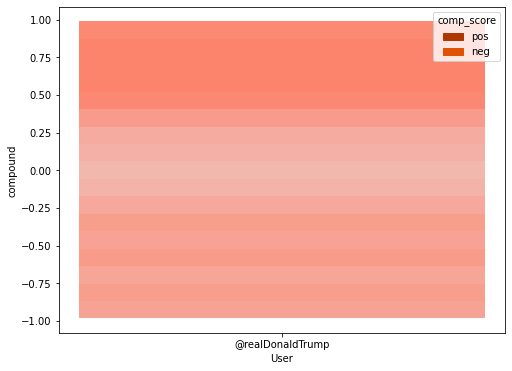

In [25]:
#sns.set_palette("Spectral")

plt.figure(figsize=(8, 6))
sns.histplot(x='User', y= 'compound', hue = 'comp_score', data=df);


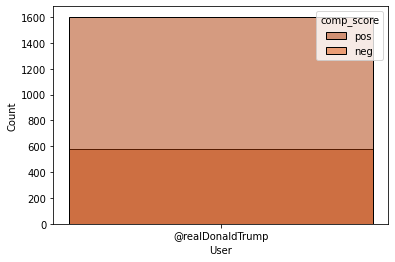

In [26]:
sns.histplot(x='User', hue='comp_score', data=df);

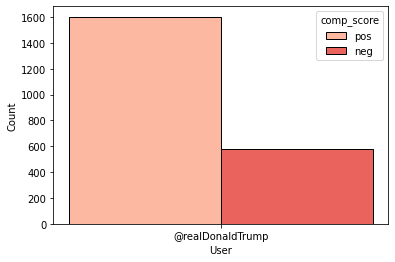

In [27]:
sns.histplot(x='User', hue='comp_score', multiple='dodge', palette='Reds',
             data=df, shrink=0.8); 

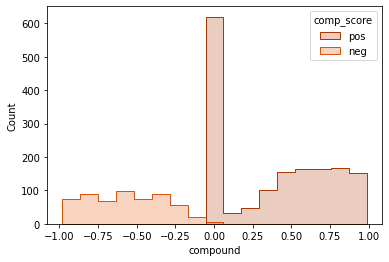

In [28]:
sns.histplot(x='compound', hue='comp_score', element='step',data=df);

Like I said above, this is a WIP and I'll keep looking at different types of sentiment analysis. Updated shortly....
